In [1]:
from sklearn import datasets
iris = datasets.load_iris()

In [2]:
x = iris["data"] 
y = iris["target"]

In [3]:
import pandas as pd
X=pd.DataFrame(x,columns=['sepal length','sepal width','petal length','petal width'])
Y=pd.DataFrame(y,columns=['iris species'])
data=pd.concat([X,Y],axis=1)
data

,sepal length,sepal width,petal length,petal width,iris species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
data.head()

,sepal length,sepal width,petal length,petal width,iris species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
data.shape

(150, 5)

In [16]:
print(data['iris species'].unique())
print(data['iris species'].value_counts())

[0 1 2]
0    50
1    50
2    50
Name: iris species, dtype: int64


In [17]:
print(data['iris species'].value_counts(normalize=True))

0    0.333333
1    0.333333
2    0.333333
Name: iris species, dtype: float64


In [18]:
data.describe()

,sepal length,sepal width,petal length,petal width,iris species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [25]:
y_df=data['iris species']
X_df=data.drop(['iris species'],axis=1)

In [24]:
print(type(X_df))
print(type(y_df))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test= train_test_split(X_df,y_df,test_size=0.20,random_state=42)

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
clf=RandomForestClassifier(random_state=42)

In [31]:
X_train=X_train.values
y_train=y_train.values

In [32]:
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [33]:
importance=list(clf.feature_importances_)
importance

[0.10809762464246378,
 0.030386812473242528,
 0.43999397414456937,
 0.4215215887397244]

# OOB

In [37]:
RANDOM_STATE=42

In [38]:
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
      RandomForestClassifier(  n_estimators=100,
                               warm_start=True, 
                               oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)
    ),
    ("RandomForestClassifier, max_features='log2'",
      RandomForestClassifier(  n_estimators=100,
                               warm_start=True, 
                               max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)
    ),
    ("RandomForestClassifier, max_features=None",
      RandomForestClassifier(  n_estimators=100,
                               warm_start=True, 
                               max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE)
    )
]

In [39]:
# just checkin ...
for label, clf in ensemble_clfs:
    print(label, '\n', clf)

RandomForestClassifier, max_features='sqrt' 
 RandomForestClassifier(max_features='sqrt', oob_score=True, random_state=42,
                       warm_start=True)
RandomForestClassifier, max_features='log2' 
 RandomForestClassifier(max_features='log2', oob_score=True, random_state=42,
                       warm_start=True)
RandomForestClassifier, max_features=None 
 RandomForestClassifier(max_features=None, oob_score=True, random_state=42,
                       warm_start=True)


In [40]:
from collections import OrderedDict

In [41]:
# just checkin ...
OrderedDict((label, []) for label, _ in ensemble_clfs)

OrderedDict([("RandomForestClassifier, max_features='sqrt'", []),
             ("RandomForestClassifier, max_features='log2'", []),
             ('RandomForestClassifier, max_features=None', [])])

In [42]:
# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)
error_rate

OrderedDict([("RandomForestClassifier, max_features='sqrt'", []),
             ("RandomForestClassifier, max_features='log2'", []),
             ('RandomForestClassifier, max_features=None', [])])

In [43]:
# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 175

In [44]:
for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

In [46]:
import matplotlib.pyplot as plt

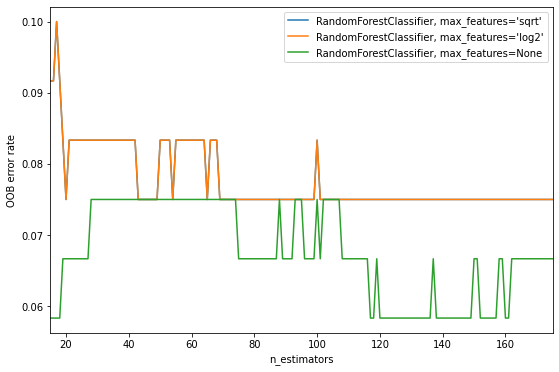

In [47]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
plt.figure(figsize=(9,6))
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

### Random forest classifier with max feature='log2' gives more OOB error rate

### Random forest classifier with max feature='None' gives less OOB error rate